## ¿Y cómo funciona la regresión lineal?

**Definición:** Dado un conjunto de datos $\{y_i,~x_{i1},...~x_{ip}\}^n _{i=1}$, donde $Y$ es una variable aleatoria dependiente o de respuesta y cada $X_p$ es una variable predictora controlada y libre de error también conocida como variable independiente. Suponemos que existe una relación lineal entre ambos tipos de variable, y tenemos que para cada observación $i$ podemos expresar a cada $y_i$ como una combinación lineal de los parámetros $\beta_i$ y sus predictores, lo cual se denotaría de la siguiente manera:

$$y_i~=~\beta_0+ \beta_1 x_i + ... + \beta_p x_i + \epsilon_i~=~\beta_0 + \vec x^T_i \vec \beta + \epsilon_i$$

A veces suele presentarse dicha expresión con notación matricial para incluir a las $n$ observaciones:

**$$Y=\beta X + \epsilon$$**

**Supuestos:**

1. Exogeneidad débil: las variables independientes pueden ser consideradas como NO aleatorias o libres de error.
2. Linealidad: la variable de respuesta puede expresarse como una combinación lineal de los parámetros y las variables.
3. Homocedasticidad: valores diferentes de la variable de respuesta tienen la misma varianza sin importar los valores de sus variables predictoras asociadas.
4. Independencia: los valores que toman los residuales son independientes (o están débilmente correlacionados) entre sí.

Una vez conocida la definición y los supuestos necesarios para ajustar un modelo lineal, ¿cómo encontramos los valores óptimos de los parámetros $\beta_i$? pues mediante el método de ajuste por **mínimos cuadrados**.

Consideremos un caso de regresión lineal simple donde sólo tengamos una variable predictora o independiente.


In [3]:
# Loading libraries
import random, pylab, numpy

In [4]:
# Loading data
# Defining functions
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline() #discard header
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

spring = getData('springData.txt')
spring

([0.1,
  0.15,
  0.2,
  0.25,
  0.3,
  0.35,
  0.4,
  0.45,
  0.5,
  0.55,
  0.6,
  0.65,
  0.7,
  0.75,
  0.8,
  0.85,
  0.9,
  0.95,
  1.0],
 [0.0865,
  0.1015,
  0.1106,
  0.1279,
  0.1892,
  0.2695,
  0.2888,
  0.2425,
  0.3465,
  0.3225,
  0.3764,
  0.4263,
  0.4562,
  0.4502,
  0.4499,
  0.4534,
  0.4416,
  0.4304,
  0.437])

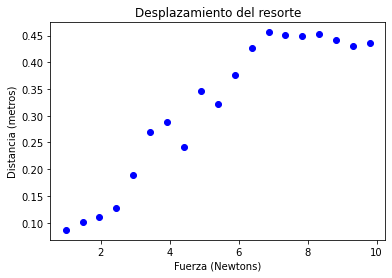

In [6]:
# Plotting data

def labelPlot():
    pylab.title('Desplazamiento del resorte')
    pylab.xlabel('Fuerza (Newtons)')
    pylab.ylabel('Distancia (metros)')

def plotData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  #acc. due to gravity
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured displacements')
    labelPlot()
    
plotData('springData.txt')

Tenemos un total de 19 observaciones en donde se midió la distancia en metros que un resorte se desplazaba al colgársele distintas masas. Entonces supondremos que existe una recta hipotética de la forma:

$$\hat Y= \beta X$$

la cual va a tener la propiedad de minimizar las distancias verticales de cada valor $y_i$ hacia ella. Es decir minimizaremos esta cantidad para toda observación $i$:

$$|\hat y_i - y_i|$$

Sin embargo, sabemos por cálculo uno que el valor absoluto no es una función derivable, y por ende minimizable, en su valor mínimo, por lo que entonces consideraremos la siguiente expresión:

$$e_i = (\hat y_i - y_i)^2$$

el cual se conoce como error cuadrático, residual o residuo asociado a la observación $i$, considerando a todos estos errores a la vez tenemos que la función a minimizar en realidad es:

$$\Sigma~e_i = \Sigma~(\hat y_i - y_i)^2$$

otra manera de analizar esta expresión es:

$$Error = (Predicciones - Observaciones)^2$$

$$Error(\beta_p) = ((\beta_0 + \vec x^T_i \vec \beta) - Observaciones)^2$$

Para el caso que estamos considerando en el que únicamente tenemos una variable independiente tendríamos:

$$Error(\beta_p) = ((\beta_0 + \beta_1 X_1) - Observaciones)^2$$

Entonces tenemos una función de error que depende de dos variables, ambos parametros $\beta_0$ y $\beta_1$, ahora sólo tenemos que derivar respecto a una y otra para obtener las expresiones que nos permitiran obtener los valores que minimizan la función de error.

**Ejercicio:** 
1. Obten la expresión analítica de ambas parciales para este ejemplo.
2. Ya que encuentres las expresiones para encontrar los valores que minimizan el error cuadrático, ¿qué puedes decir del punto $(\bar X, \bar Y)$?

a = 0.04643203319205251 b = 0.06562859649122818


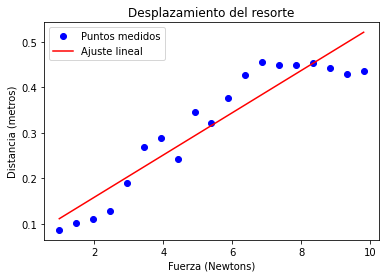

In [10]:
def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Puntos medidos')
    labelPlot()                 
    a,b = pylab.polyfit(xVals, yVals, 1)# En esta función podemos variar el grado del polinomio que ajustamos a los datos
    estYVals = a*pylab.array(xVals) + b
    print('a =', a, 'b =', b)
    pylab.plot(xVals, estYVals, 'r',
               label = 'Ajuste lineal')#, k = '
               #+ str(round(1/a, 5)))
    pylab.legend(loc = 'best')

fitData("springData.txt")